# 6.5 Machine Learning Adidas data set Part 2¶


## This script contains the following:
1. Importing libraries and data 
2. The elbow technique
3. k-means clustering

## Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from pathlib import Path

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = Path("C:/", "Users", "nayla", "Desktop", "Carrer F", "Curso de inmersion", "Unidad 6")

In [4]:
data = pd.read_csv( 
    path.joinpath('02 data', 'Adidas_US_Sales-clean.csv'), index_col=0, sep=",")

In [5]:
data

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,2020-05-01,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


In [9]:
# Create a subset becouse need remove any categorical columns from the data.
df=data.iloc[:,[6,7,8,9,10]]

In [11]:
df.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,50,1200,600000,300000,50
1,50,1000,500000,150000,30
2,40,1000,400000,140000,35
3,45,850,382500,133875,35
4,60,900,540000,162000,30


## 2. The elbow technique

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-222585195278924.47,
 -58090683740021.266,
 -25607290395517.258,
 -15437565366364.791,
 -10353290727307.635,
 -7787091802425.631,
 -6074145486985.043,
 -5130631882122.035,
 -4469880001976.993]

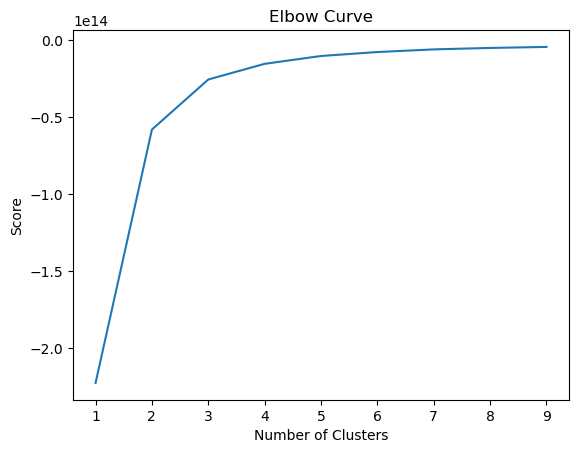

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

## 3.k-means clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [31]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [32]:
df['clusters'] = kmeans.fit_predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,clusters
0,50,1200,600000,300000,50,1
1,50,1000,500000,150000,30,1
2,40,1000,400000,140000,35,1
3,45,850,382500,133875,35,1
4,60,900,540000,162000,30,1


In [34]:
df['clusters'].value_counts()

2    6740
0    2058
1     846
Name: clusters, dtype: int64

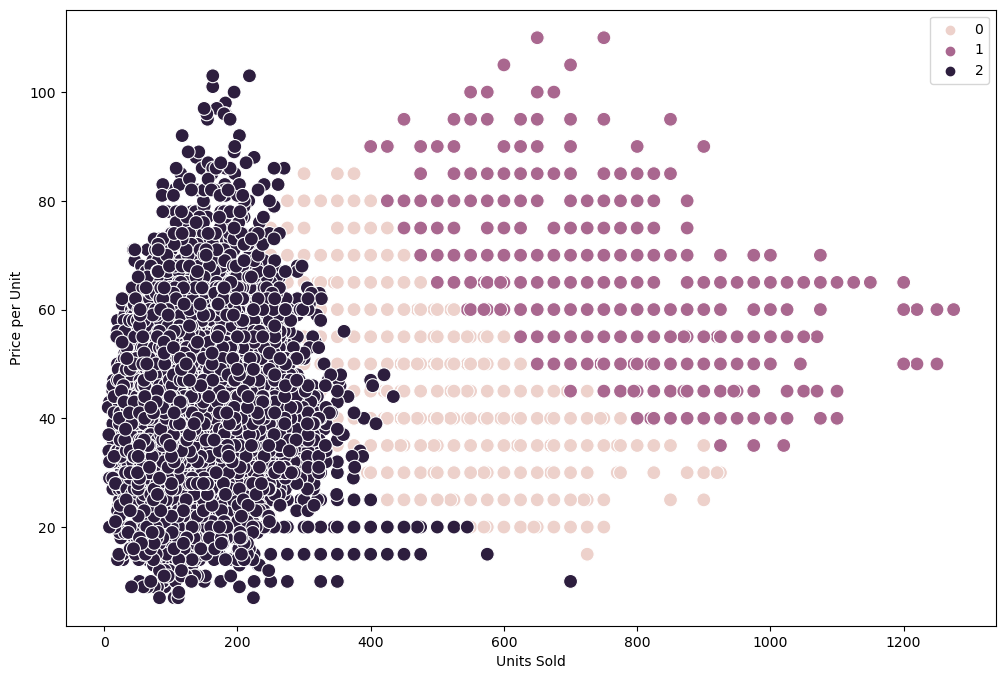

In [35]:
# Plot the clusters for the "Price per Unit" and "Unit Sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Units Sold'], y=df['Price per Unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Units Sold') # Label x-axis.
plt.ylabel('Price per Unit') # Label y-axis.
plt.show()

Interpretation of the graph: We can see that the dark red group has all the prices per unit but 
those that do not have as many sales, the dark pink group contains almost all the prices per unit
but already has more sales, and the last group is the They have more sales and most of the prices
are above $30.

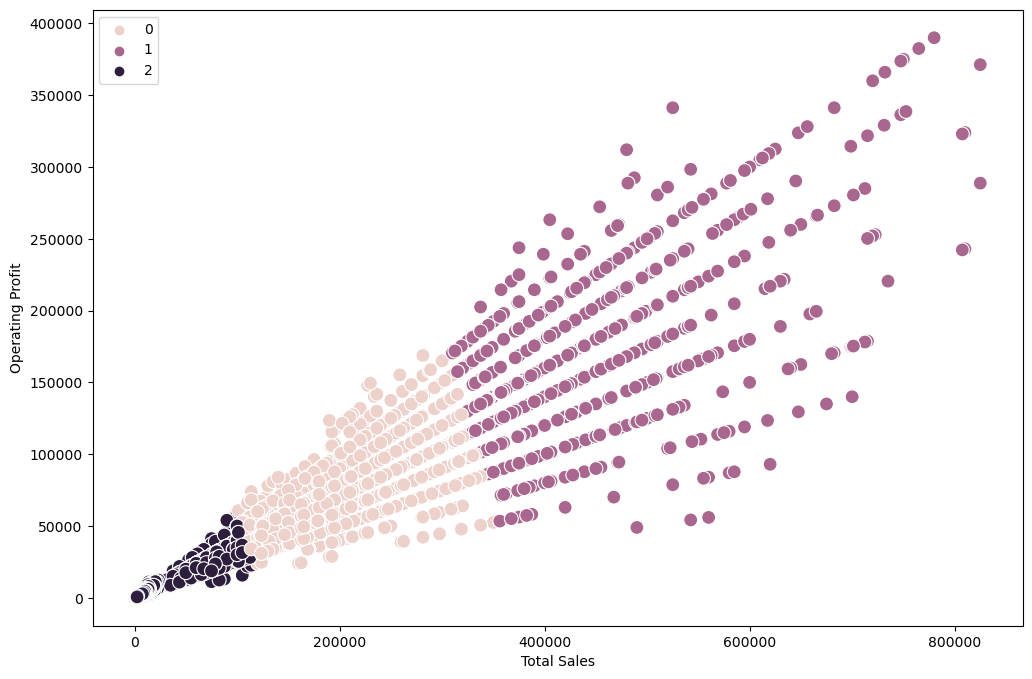

In [36]:
# Plot the clusters for the "Total Sales" and "Operating Profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Sales'], y=df['Operating Profit'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Sales') 
plt.ylabel('Operating Profit') 
plt.show()

Interpretation of the graph: We can see that the dark red group belongs to the lowest total sales group with the lowest profit, the light pink belongs to a medium group and the strong pink belongs to the highest sales and the highest profit.


In [37]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
df.groupby('cluster').agg({'Units Sold':['mean', 'median'], 
                         'Total Sales':['mean', 'median'], 
                         'Operating Profit':['mean', 'median'],
                          'Price per Unit':['mean', 'median']})

Units Sold           Total Sales           Operating Profit  \
                   mean median           mean    median             mean   
cluster                                                                    
dark purple  143.176706  133.0   15182.770772    5848.0      5899.593917   
pink         432.896016  425.0  202416.059281  195000.0     73392.640428   
purple       736.347518  725.0  450352.245863  425000.0    167056.507092   

                      Price per Unit         
               median           mean median  
cluster                                      
dark purple    2660.0      42.045252   41.0  
pink          70000.0      48.542274   50.0  
purple       157500.0      62.458629   60.0

### what these results could be useful for in future steps of an analytics pipeline.
These results are very useful to create new columns with different flags and to continue studying them separately.
and relating them to time.